In [1]:
import cairo
import math
from io import BytesIO
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np 

In [30]:
# Code to Build the map
def wrapper(arr, theta=0):
    svgio = BytesIO()
    surface = cairo.SVGSurface(svgio, 200*len(arr[0]), 200*len(arr))
    context = cairo.Context(surface)
    context.scale(200*len(arr[0]), 200*len(arr))
    
    # Build the Map
    build_map(arr, context)

    # theta = 0
    unit = 1/len(arr)
#     ctx2 = cairo.Context(surface)
#     ctx2.scale(200)
    put_car(0.5,0.5,theta,1/len(arr),context)
    
    surface.write_to_png('track.png')
    surface.finish()
    
    # return IPython.display.SVG(data=svgio.getvalue())
    svg = IPython.display.SVG(data=svgio.getvalue())
    IPython.display.display(svg)
    return None

def build_map(arr, context):
    for i in range(0, len(arr)):
        for j in range(0, len(arr[0])):
            cell = arr[i][j]
            context.set_line_width(0.1*(1/len(arr)))
            lx = j/len(arr[0])
            ly = i/len(arr)
            if cell == "s":
                
                context.move_to(lx,  ly + 0.5/len(arr))
                context.line_to(lx + 1/len(arr[0]), ly + 0.5/len(arr))

                context.stroke()

            if cell == "sd":
                print(lx + 0.5/len(arr[0]),  ly)
                print(lx + 0.5/len(arr[0]), ly + 1/len(arr))
                context.move_to(lx + 0.5/len(arr[0]),  ly)
                context.line_to(lx + 0.5/len(arr[0]), ly + 1/len(arr))

                context.stroke()

            if cell == "cdr":
                context.arc(lx + 1/len(arr[0]), 
                           ly + 1/len(arr), 0.5/len(arr),
                           math.pi, 3*math.pi/2)

                context.stroke()

            if cell == "cur":
                context.arc(lx + 1/len(arr[0]), 
                           ly, 0.5/len(arr),
                           math.pi/2, math.pi)

                context.stroke()

            if cell == "cul":
                context.arc(lx, 
                           ly, 0.5/len(arr),
                           0, math.pi/2)

                context.stroke()

            if cell == "cdl":
                context.arc(lx, 
                           ly + 1/len(arr), 0.5/len(arr),
                           3*math.pi/2, 0)

                context.stroke()    
    return 


# Puts the car down on the map
# NEED TO FIGURE OUT HOW TO SCALE THIS RECTANGLE
def put_car(x,y,theta,unit,context):
#     context.rotate(0.5)
   
    
    
    pat = cairo.LinearGradient(0.0, 0.0, 0.0, 1.0)
    pat.add_color_stop_rgba(1, 0.7, 0, 0, 0.95)  # First stop, 50% opacity
    pat.add_color_stop_rgba(0, 0.9, 0.7, 0.2, 1)  # Last stop, 100% opacity
    context.set_source(pat)
    
    # theta=math.pi/4
#     mtx = cairo.Matrix(math.cos(theta), -math.sin(theta),
#                 math.sin(theta), math.cos(theta))

#     context.transform(mtx)
    context.rotate(theta)
    context.rectangle(0.25,-0.1,unit/5,unit/9) # Totate moves the entire context, just want to change the object
    
    
    context.fill()
    
    return
    
            

In [31]:
def f(theta):
    # This is a test track
    arr = [["cdr","s","cdl"],
           ["cur", "s", "cul"],
          ["", "", ""]]
    # arr = [["cdr","cdl"],
    #        ["sd","sd"],
    #        ["cur", "cul"]]
    wrapper(arr, theta)

In [33]:
interactive(f,theta=(0.4,1.8))

interactive(children=(FloatSlider(value=1.1, description='theta', max=1.8, min=0.4), Output()), _dom_classes=(…

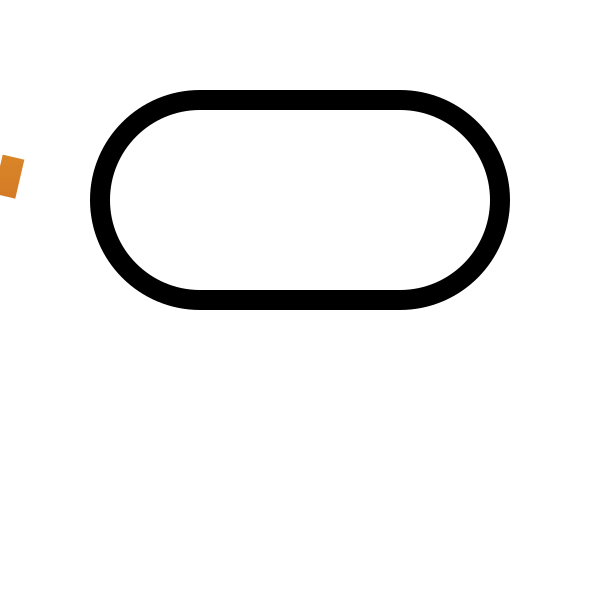

2.147716848005075

In [48]:
from time import sleep
# This is a test track
arr = [["cdr","s","cdl"],
       ["cur", "s", "cul"],
      ["", "", ""]]
# arr = [["cdr","cdl"],
#        ["sd","sd"],
#        ["cur", "cul"]]

def video():
    for theta in np.linspace(0.4, 1.8, 100):
        IPython.display.clear_output(wait=True)
        wrapper(arr, theta)
        # sleep(0.03)
        
import timeit
# this takes 2.1 seconds on my machine, so 50 fps is possible?
timeit.timeit(video, number=1)